In [1]:
import matplotlib.pylab as plt
import numpy as np 
import arby
from scipy.integrate import odeint

In [2]:
def pend(y, t, b, λ):
    θ, ω = y
    dydt = [ω, -b*ω - λ*np.sin(θ)]

    return dydt

In [3]:
# set friction strength
b = 0.2
# set initial conditions
y0 = [np.pi/2, 0.]

In [36]:
# set a time discretization
times = np.linspace(0,50,10001)

In [37]:
# plot a simple solution
λ = 1.
sol = odeint(pend,y0, times, (b,λ))

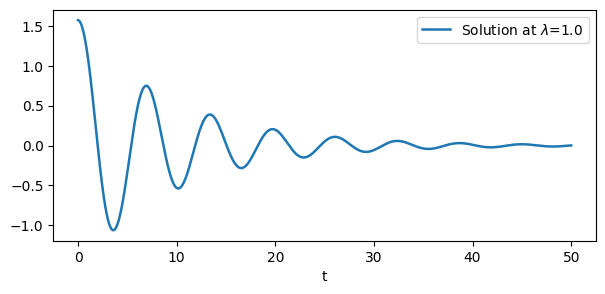

In [38]:
plt.figure(figsize=(7,3))
plt.plot(times, sol[:,0], label=f'Solution at $\lambda$={λ}', lw=1.8)
plt.xlabel('t')
plt.legend()

In [39]:
from arby import ReducedOrderModel as ROM


In [40]:
param = np.linspace(1,5,11)

In [41]:
%%time
training = []
for λ in param:
    sol = odeint(pend,y0, times, (b,λ))
    training.append(sol[:,0])

CPU times: user 84.5 ms, sys: 295 µs, total: 84.8 ms
Wall time: 83.1 ms


In [42]:
pendulum = ROM(training, times, param, greedy_tol=1e-10, poly_deg=5)

In [43]:
pendulum.surrogate(1.14)

array([1.57079633, 1.57078209, 1.57073937, ..., 0.0083794 , 0.00835445,
       0.00832922])

In [44]:
surr = pendulum.surrogate

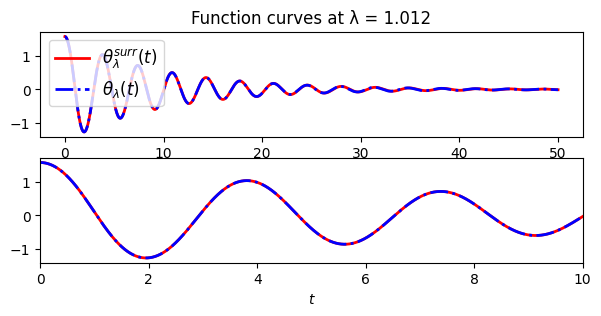

In [45]:
par = 3.42
sol = odeint(pend,y0, times, (b,par))[:,0]
fig, ax = plt.subplots(2,1, figsize=(7,3))
ax[0].plot(times, surr(par), 'r', lw=2, label='$θ_λ^{surr}(t)$')
ax[0].plot(times, sol, 'b-.', lw=2, label='$θ_λ(t)$')
ax[1].plot(times, surr(par), 'r', lw=2, label='$θ_λ^{surr}(t)$')
ax[1].plot(times, sol, 'b-.', lw=2, label='$θ_λ(t)$')
ax[1].set(xlim=(0,10))
ax[1].set(xlabel='$t$')
ax[0].set_title('Function curves at λ = 1.012')
ax[0].legend(fontsize = 'large')

In [46]:
pendulum.basis_.eim_.nodes[:5]

[0, 722, 1394, 893, 1984]

In [47]:
np.shape(pendulum.basis_.eim_.interpolant)

(10001, 11)

In [48]:
pwd

'/home/agustin/facultad/scikit_rm/scikit-reducedmodel'

In [49]:
from skreducedmodel.reducedbasis import ReducedBasis

In [50]:
model = ReducedBasis(
                     index_seed_global_rb = 0,
                     greedy_tol = 1e-20,
                     lmax = 0, 
                     normalize = False
                     )

In [51]:
rb = model.fit(
               training_set = np.array(training), 
               parameters = param, 
               physical_points = times,
               )

In [52]:
model.tree.basis.shape

(11, 10001)

In [53]:
len(training)

11

In [54]:
param.shape

(11,)

In [55]:
model.tree.basis[0]

array([0.62674196, 0.62673697, 0.62672202, ..., 0.00062949, 0.00064876,
       0.000668  ])

In [56]:
for i in range(model.tree.basis.shape[0]):
    print(np.abs(model.tree.basis[i]))

[0.62674196 0.62673697 0.62672202 ... 0.00062949 0.00064876 0.000668  ]
[5.95265722e-01 5.95246607e-01 5.95189274e-01 ... 1.31508688e-04
 1.72739187e-04 2.13915735e-04]
[0.39466096 0.39465461 0.39463554 ... 0.0037494  0.00372649 0.0037034 ]
[0.40013847 0.40011924 0.40006155 ... 0.00436107 0.00433999 0.00431839]
[0.16343033 0.16342653 0.16341516 ... 0.00350822 0.00347767 0.00344684]
[0.15074765 0.15074616 0.15074169 ... 0.00166208 0.00161086 0.00155961]
[0.07583442 0.07583374 0.07583172 ... 0.00476616 0.00476033 0.00475432]
[0.0313674  0.03136681 0.03136506 ... 0.01041762 0.01045454 0.01049025]
[0.04122573 0.04122504 0.04122295 ... 0.00020403 0.00020493 0.0002058 ]
[0.03314202 0.03314128 0.03313903 ... 0.00081697 0.00079377 0.00077058]
[0.0493153  0.0493122  0.04930291 ... 0.00081211 0.00094472 0.00107693]


In [33]:
data1 = np.array(model.tree.basis[0])
print(data1)


[6.23990546e-01 6.23495636e-01 6.22017490e-01 ... 2.75798200e-04
 4.71997586e-04 6.65070886e-04]


In [34]:
print(model.transform(data1,param))

[6.23990546e-01 6.23495636e-01 6.22017490e-01 ... 2.75798200e-04
 4.71997586e-04 6.65070886e-04]


In [36]:
assert data1.all() == model.transform(data1,param).all()

In [32]:
np.shape(model.transform(data1,param))

(1001,)

In [21]:
from skreducedmodel.skeim import EIM

In [22]:
a = EIM(reduced_base = model)

In [23]:
a.fit

In [24]:
a.nodes

[0,
 70,
 95,
 144,
 232,
 167,
 316,
 253,
 409,
 475,
 425,
 336,
 568,
 627,
 695,
 747,
 494,
 840,
 902,
 816,
 920,
 980,
 765,
 1000,
 550,
 966,
 945,
 397,
 417,
 450,
 467,
 485,
 678,
 457,
 557,
 540,
 577,
 533,
 612,
 596,
 662]

In [25]:
a.nodes[1]

70

In [26]:
stop

NameError: name 'stop' is not defined

In [ ]:
model.integration

In [ ]:
rb = model.fit(
               training_set = np.array(training), 
               parameters = param, 
               physical_points = times,
               )

len(rb.indices),rb.indices,

plt.figure(figsize=(5,3))
plt.yscale("log")
plt.plot(rb.errors,"o")

In [ ]:
rb.indices[9]

In [ ]:
from scipy.integrate import odeint

def pend(y, t, b, λ):
    θ, ω = y
    dydt = [ω, -b*ω - λ*np.sin(θ)]

    return dydt

def test_ReducedModelFit():
    
    b = 0.2
    y0 = [np.pi/2, 0.]
    
    param = np.linspace(1,5,101)
    times = np.linspace(0,50,1001)
     
    training = []
    for λ in param:
        sol = odeint(pend,y0, times, (b,λ))
        training.append(sol[:,0])
    
    training_set = np.array(training) 
    parameters = param
    physical_points = times
    nmax = 10
        
    model = ReducedModel(
                     seed_global_rb = 0,
                     greedy_tol = 1e-16,
                     lmax = 1, 
                     nmax = nmax,
                     normalize = True
                     )
    
    rb = model.fit(
               training_set = training_set, 
               parameters = parameters, 
               physical_points = physical_points,
               )
    
    print(rb.errors[nmax-1],rb.errors[0])
    
    assert rb.errors[0]>rb.errors[nmax-1]
    assert rb.errors[5]>rb.errors[nmax-1]
    assert len(rb.indices) == nmax

In [ ]:
test_ReducedModelFit()

In [ ]:
len(rb.indices)

In [ ]:
rb.indices

In [ ]:
arby_model = arby.reduced_basis(np.array(training), times, greedy_tol=1e-16, normalize=True)

In [ ]:
arby_model.errors[0] == rb.errors[0]

In [ ]:
arby_model.indices